In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [3]:
dataset=pd.read_csv('/content/emails (1).csv')

In [4]:
dataset.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [5]:
vectorizer=CountVectorizer()
x=vectorizer.fit_transform(dataset['text'])

In [6]:
x_train,x_test,y_train,y_test=train_test_split(x,dataset['spam'],test_size=0.2)

In [7]:
model=MultinomialNB()
model.fit(x_train,y_train)

MultinomialNB()

In [8]:
yPred=model.predict(x_test)

#evaluate the model
accuracy=accuracy_score(y_test,yPred)
print("Accuracy:",accuracy)

Accuracy: 0.9904013961605584


In [13]:
#function to predict if a msg is spam or not
def predictMessage(message):
  messageVector=vectorizer.transform([message])
  prediction=model.predict(messageVector)
  return 'Spam' if prediction[0]==1 else 'Ham'


#get user input to predict

userMessage=input('enter text to predict: ')
prediction=predictMessage(userMessage)
print(f'the message is: {prediction}')

enter text to predict: Hey! You have won an Iphone. Click here to claim
the message is: Spam


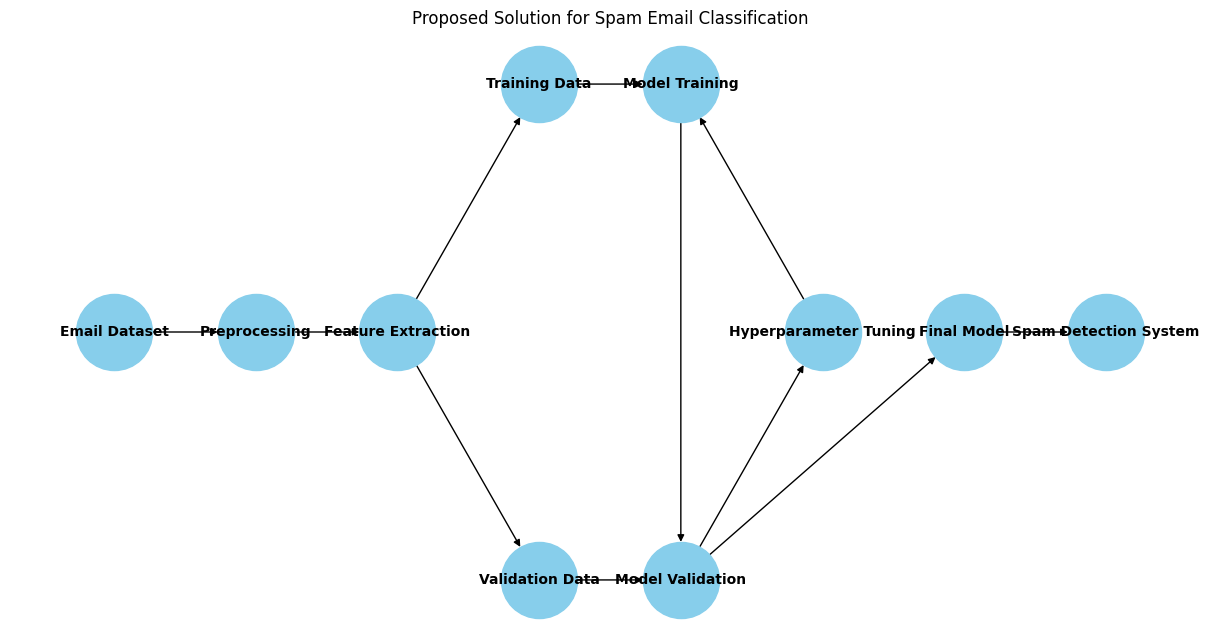

In [14]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Add nodes
nodes = [
    "Email Dataset", "Preprocessing", "Feature Extraction",
    "Training Data", "Validation Data", "Model Training",
    "Model Validation", "Hyperparameter Tuning", "Final Model",
    "Spam Detection System"
]
G.add_nodes_from(nodes)

# Add edges
edges = [
    ("Email Dataset", "Preprocessing"),
    ("Preprocessing", "Feature Extraction"),
    ("Feature Extraction", "Training Data"),
    ("Feature Extraction", "Validation Data"),
    ("Training Data", "Model Training"),
    ("Validation Data", "Model Validation"),
    ("Model Training", "Model Validation"),
    ("Model Validation", "Hyperparameter Tuning"),
    ("Hyperparameter Tuning", "Model Training"),
    ("Model Validation", "Final Model"),
    ("Final Model", "Spam Detection System")
]
G.add_edges_from(edges)

# Define positions for nodes
pos = {
    "Email Dataset": (0, 4),
    "Preprocessing": (2, 4),
    "Feature Extraction": (4, 4),
    "Training Data": (6, 5),
    "Validation Data": (6, 3),
    "Model Training": (8, 5),
    "Model Validation": (8, 3),
    "Hyperparameter Tuning": (10, 4),
    "Final Model": (12, 4),
    "Spam Detection System": (14, 4)
}

# Draw the graph
plt.figure(figsize=(12, 6))
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="skyblue", font_size=10, font_weight="bold", arrows=True)
plt.title("Proposed Solution for Spam Email Classification")
plt.show()